<span STYLE="font-size:150%"> 
    Segment microCT scans
</span>

Docker image: gnasello/slicer-env:2023-07-06 \
Latest update: 10 March 2023

- load image stack in Slicer
- segment mineralized tissue
- compute segmented statistics (volumes)

In [ ]:
# Monitor Memory in Slicer
import psutil, os
print(psutil.Process(os.getpid()).memory_info().rss / (1024**3), "GB used")

# Load libraries

In [ ]:
import pyslicer as ps
import slicer
from pathlib import Path
import pandas as pd

# Volume input

## Load `.nrrd` file into 3D Slicer

Write the path of the `.nrrd` file and load it to Slicer

In [ ]:
# this cell is tagged 'parameters'
volume_file = 'microCT_volume/microCT_volume.nrrd'
output_dir_path = 'segmented_volumes'

In [ ]:
path = Path(volume_file)

# Remove image numbering _0000, _0001 ...
filename_output = path.stem[:-4]

In [ ]:
masterVolumeNode = slicer.util.loadNodeFromFile(volume_file)

Print spacing

In [ ]:
## mm
masterVolumeNode.GetSpacing()

Make ```segmented_volumes``` folder

In [ ]:
output_directory = Path(output_dir_path)

output_directory.mkdir(parents=True, exist_ok=True)

# Create segmentationNode

## Create segmentation-related nodes

Create segmentation node

In [ ]:
segmentationNode = ps.segmentation.segmentationNode(name='Segmentation')

Create temporary segment editor to get access to effects

In [ ]:
segmentEditorWidget, segmentEditorNode = ps.segmentation.segmentEditorWidget(segmentationNode = segmentationNode, 
                                                                             masterVolumeNode = masterVolumeNode)

In [ ]:
# Monitor Memory in Slicer
import psutil, os
print(psutil.Process(os.getpid()).memory_info().rss / (1024**3), "GB used")

# Thresholding

## Check different automatic segmentation algorithms

The first time you analyze an image/channel. Go to the ```Segment Editor```, add a new segment and choose the thresholding method. There you test different automatic thresholding technique and choose the one working best. For later analysis, you can just copy the thresholding values in the ```segments_greyvalues``` object at the beginning of this notebook.

In [ ]:
ps.volume.plot_histogram(masterVolumeNode, yscale='log')

Get automatic thresholding values, as indicated in [this script](https://github.com/jzeyl/3D-Slicer-Scripts/blob/db51967cc642837e8bae0fea1585a95074d8420b/load_dicom_modified_otsu.py#L56)

In [ ]:
methods = [
            'HUANG',
            'INTERMODES',
            'ISO_DATA',
            'KITTLER_ILLINGWORTH',
            'LI',
            'MAXIMUM_ENTROPY',
            'MOMENTS',
            'OTSU',
            'RENYI_ENTROPY',
            'SHANBHAG',
            'TRIANGLE',
            'YEN'
            ]

thresholds = dict.fromkeys(methods, None)
thresholds

Otsu thresholding

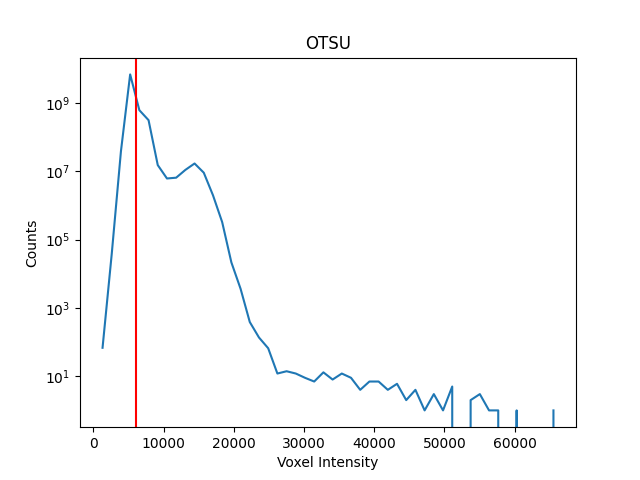

In [ ]:
method = 'OTSU'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

Huang thresholding

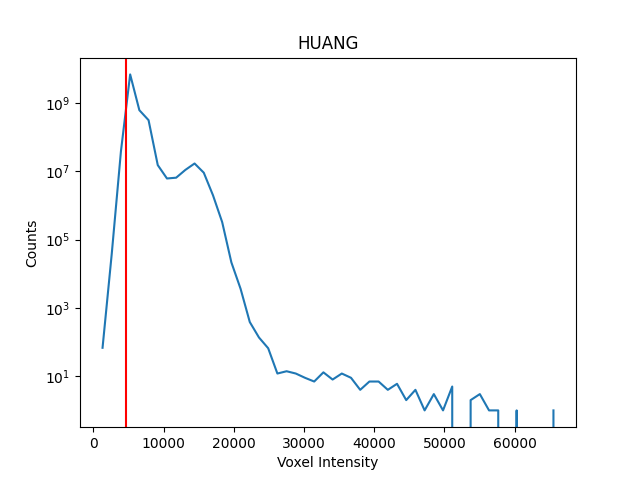

In [ ]:
method = 'HUANG'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

IsoData thresholding

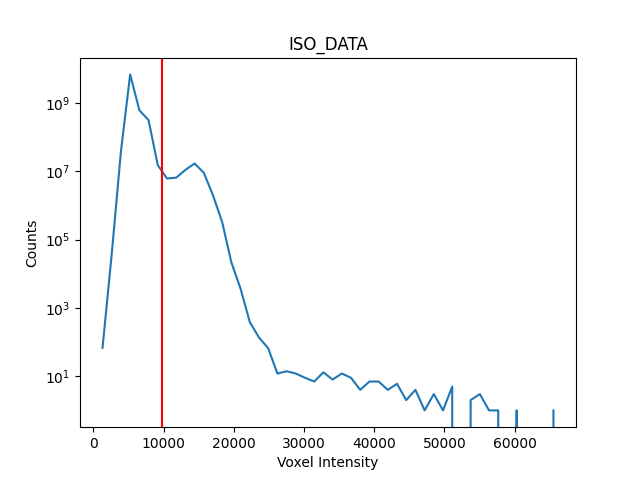

In [ ]:
method = 'ISO_DATA'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

MAXIMUM_ENTROPY thresholding

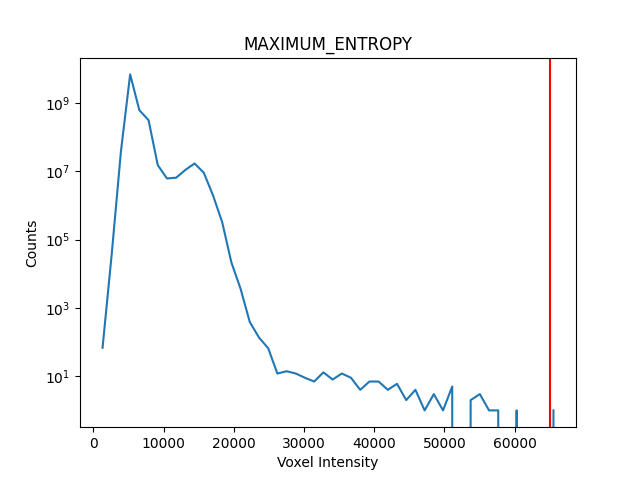

In [ ]:
method = 'MAXIMUM_ENTROPY'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

MOMENTS thresholding

In [ ]:
method = 'MOMENTS'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

INTERMODES thresholding

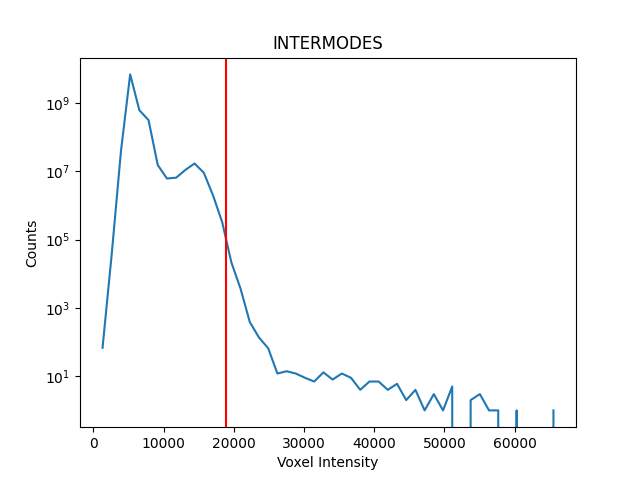

In [ ]:
method = 'INTERMODES'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

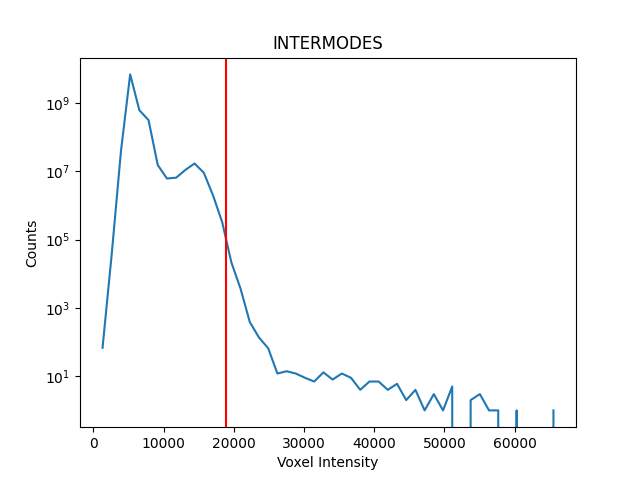

In [ ]:
method = 'LI'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

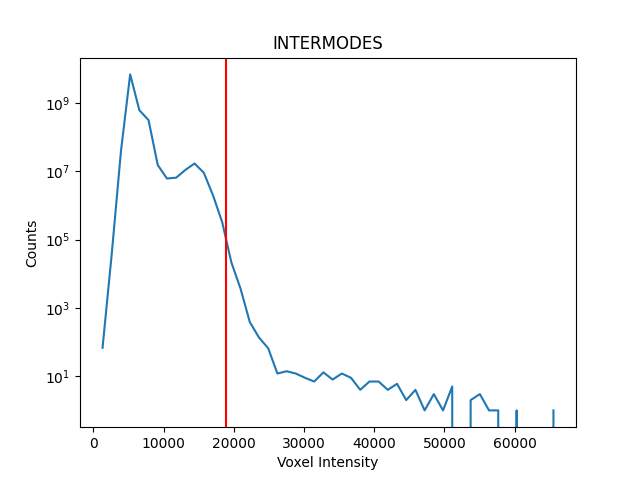

In [ ]:
method = 'RENYI_ENTROPY'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

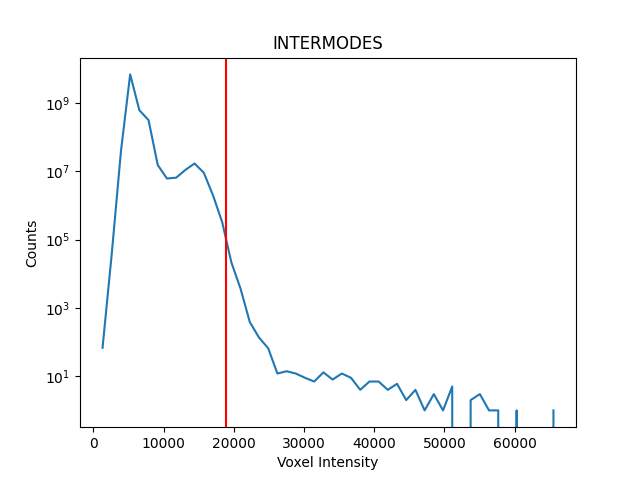

In [ ]:
method = 'TRIANGLE'

threshold = ps.segmentation.compute_threshold(method = method, volumeNode = masterVolumeNode)

thresholds[method.upper()] = threshold

print(method + " threshold: " + str(threshold))
ps.volume.plot_histogram(masterVolumeNode, threshold = threshold, title = method, yscale='log')

## Select thresholding values

In [ ]:
thresholds

In [ ]:
segments_greyvalues = {
    "Bone": [thresholds['MOMENTS']*1.3, 65535], # [MaxEntropy, MaxIntensity]
    }

segments_greyvalues

In [ ]:
grey_df = pd.DataFrame(segments_greyvalues)

outputfile = output_directory / 'segments_greyvalues.csv'
grey_df.to_csv(outputfile, index=False)